Курсовой проект

In [21]:
!pip install xgboost

In [22]:
!pip install lightgbm

In [23]:
!pip install catboost

  Created wheel for retrying: filename=retrying-1.3.3-cp37-none-any.whl size=11435 sha256=eec1b9c6313ce3ad6244fb98777bede2ad519632e6cb0b30dfe397f4f4c6a6e6
  Stored in directory: C:\Users\Asus\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [371]:
data = pd.read_csv('course_project_train.csv')

In [372]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
data.head(10)

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0
5,Rent,NaN,7 years,0.0,12.0,14.6,366784.0,0.0,NaN,0.0,other,Long Term,337304.0,165680.0,18692.0,NaN,1
6,Home Mortgage,1511108.0,10+ years,0.0,9.0,20.3,388124.0,0.0,73.0,0.0,home improvements,Short Term,99999999.0,51623.0,2317.0,745.0,0
7,Rent,1040060.0,10+ years,0.0,13.0,12.0,330374.0,0.0,18.0,0.0,other,Short Term,250888.0,89015.0,19761.0,705.0,1
8,Home Mortgage,NaN,5 years,0.0,17.0,15.7,0.0,1.0,NaN,1.0,home improvements,Short Term,129734.0,19.0,17.0,NaN,0
9,Home Mortgage,NaN,1 year,0.0,10.0,24.6,511302.0,0.0,6.0,0.0,debt consolidation,Long Term,572880.0,205333.0,17613.0,NaN,1


In [373]:
data['Credit Default'].value_counts(normalize=True)

0    0.718267
1    0.281733
Name: Credit Default, dtype: float64

70/30 - норм баланс

In [374]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
Home Ownership                  7500 non-null object
Annual Income                   5943 non-null float64
Years in current job            7129 non-null object
Tax Liens                       7500 non-null float64
Number of Open Accounts         7500 non-null float64
Years of Credit History         7500 non-null float64
Maximum Open Credit             7500 non-null float64
Number of Credit Problems       7500 non-null float64
Months since last delinquent    3419 non-null float64
Bankruptcies                    7486 non-null float64
Purpose                         7500 non-null object
Term                            7500 non-null object
Current Loan Amount             7500 non-null float64
Current Credit Balance          7500 non-null float64
Monthly Debt                    7500 non-null float64
Credit Score                    5943 non-null float64
Credit Default                  7

Пропуски в Anuual Income, Months since last delinquent, Bankruptcies и Credit Score

Для не-числовых признаков сделаем one-hot-encoding.. либо (как в случае с Years in current job - сконвертируем их в нормальное число)

In [375]:
one_hots = pd.get_dummies(data[['Home Ownership', 'Term', 'Purpose']])
one_hots.head()

,Home Ownership_Have Mortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Term_Long Term,Term_Short Term,Purpose_business loan,Purpose_buy a car,Purpose_buy house,Purpose_debt consolidation,Purpose_educational expenses,Purpose_home improvements,Purpose_major purchase,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_renewable energy,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding
0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [376]:
data_cleared = data.drop(['Home Ownership', 'Term', 'Purpose'], axis=1)

In [377]:
data_one_hot = data_cleared.merge(one_hots, left_index=True, right_index=True)
data_one_hot.head(10)

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Home Ownership_Have Mortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Term_Long Term,Term_Short Term,Purpose_business loan,Purpose_buy a car,Purpose_buy house,Purpose_debt consolidation,Purpose_educational expenses,Purpose_home improvements,Purpose_major purchase,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_renewable energy,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding
0,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,99999999.0,47386.0,7914.0,749.0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,264968.0,394972.0,18373.0,737.0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,99999999.0,308389.0,13651.0,742.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,121396.0,95855.0,11338.0,694.0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,125840.0,93309.0,7180.0,719.0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5,NaN,7 years,0.0,12.0,14.6,366784.0,0.0,NaN,0.0,337304.0,165680.0,18692.0,NaN,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,1511108.0,10+ years,0.0,9.0,20.3,388124.0,0.0,73.0,0.0,99999999.0,51623.0,2317.0,745.0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7,1040060.0,10+ years,0.0,13.0,12.0,330374.0,0.0,18.0,0.0,250888.0,89015.0,19761.0,705.0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8,NaN,5 years,0.0,17.0,15.7,0.0,1.0,NaN,1.0,129734.0,19.0,17.0,NaN,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,NaN,1 year,0.0,10.0,24.6,511302.0,0.0,6.0,0.0,572880.0,205333.0,17613.0,NaN,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [378]:
# Сделаем второй вариант для labelled категориальных признаков
data_labbeled = data.copy()
data_labbeled['Home Ownership'] = data['Home Ownership'].map(data.groupby('Home Ownership').size())
data_labbeled['Purpose'] = data['Purpose'].map(data.groupby('Purpose').size())
data_labbeled['Term'] = data['Term'].map(data.groupby('Term').size())
data_labbeled.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,647,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,5944,5556,99999999.0,47386.0,7914.0,749.0,0
1,647,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,5944,1944,264968.0,394972.0,18373.0,737.0,1
2,3637,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,5944,5556,99999999.0,308389.0,13651.0,742.0,0
3,647,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,5944,5556,121396.0,95855.0,11338.0,694.0,0
4,3204,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,5944,5556,125840.0,93309.0,7180.0,719.0,0


Остались Years in current job. Я думаю нужно напрямую преобразовать в числа. 10+ конечно потеряет некоторую часть информации NAN-ы пока заменим на 0 - потом предскажем возможно

In [379]:
data_one_hot['Years in current job'] = data_one_hot['Years in current job'].fillna('0')
data_labbeled['Years in current job'] = data_labbeled['Years in current job'].fillna('0')

In [380]:
import re
def to_digit(source):
    return int(re.findall(r'\d+', source)[0])

data_one_hot['Years in current job'] = data_one_hot.apply(lambda x: to_digit(x['Years in current job']), axis=1)
data_labbeled['Years in current job'] = data_labbeled.apply(lambda x: to_digit(x['Years in current job']), axis=1)

In [381]:
data_one_hot.head()

,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default,Home Ownership_Have Mortgage,Home Ownership_Home Mortgage,Home Ownership_Own Home,Home Ownership_Rent,Term_Long Term,Term_Short Term,Purpose_business loan,Purpose_buy a car,Purpose_buy house,Purpose_debt consolidation,Purpose_educational expenses,Purpose_home improvements,Purpose_major purchase,Purpose_medical bills,Purpose_moving,Purpose_other,Purpose_renewable energy,Purpose_small business,Purpose_take a trip,Purpose_vacation,Purpose_wedding
0,482087.0,0,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,99999999.0,47386.0,7914.0,749.0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1025487.0,10,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,264968.0,394972.0,18373.0,737.0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,751412.0,8,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,99999999.0,308389.0,13651.0,742.0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,805068.0,6,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,121396.0,95855.0,11338.0,694.0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,776264.0,8,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,125840.0,93309.0,7180.0,719.0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [382]:
data_labbeled.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,647,482087.0,0,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,5944,5556,99999999.0,47386.0,7914.0,749.0,0
1,647,1025487.0,10,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,5944,1944,264968.0,394972.0,18373.0,737.0,1
2,3637,751412.0,8,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,5944,5556,99999999.0,308389.0,13651.0,742.0,0
3,647,805068.0,6,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,5944,5556,121396.0,95855.0,11338.0,694.0,0
4,3204,776264.0,8,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,5944,5556,125840.0,93309.0,7180.0,719.0,0


Все не числовые данные преобразовали - остались пропуски и выбросы

# C этого момента можем уже пробовать делать базовый прогноз

In [15]:
data_for_base_prediction = data_one_hot.copy()
data_for_base_prediction_labbeled = data_labbeled.copy()

In [16]:
# Попробуем один из встроенных imputer-ов для заполнения пропусков
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [383]:
imp_mean = IterativeImputer(random_state=0)
imp_mean.fit(data_for_base_prediction)
data_array =  imp_mean.transform(data_for_base_prediction)
data_for_base_prediction = pd.DataFrame(data=data_array, columns=data_one_hot.columns)
data_for_base_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 35 columns):
Annual Income                   7500 non-null float64
Years in current job            7500 non-null float64
Tax Liens                       7500 non-null float64
Number of Open Accounts         7500 non-null float64
Years of Credit History         7500 non-null float64
Maximum Open Credit             7500 non-null float64
Number of Credit Problems       7500 non-null float64
Months since last delinquent    7500 non-null float64
Bankruptcies                    7500 non-null float64
Current Loan Amount             7500 non-null float64
Current Credit Balance          7500 non-null float64
Monthly Debt                    7500 non-null float64
Credit Score                    7500 non-null float64
Credit Default                  7500 non-null float64
Home Ownership_Have Mortgage    7500 non-null float64
Home Ownership_Home Mortgage    7500 non-null float64
Home Ownership_Own Home      

In [385]:
data_labbeled_imp = data_for_base_prediction_labbeled.drop('Credit Default', axis=1)
imp_mean.fit(data_labbeled_imp)
data_array =  imp_mean.transform(data_labbeled_imp)
data_for_base_prediction_labbeled_imp = pd.DataFrame(data=data_array, columns=data_labbeled_imp.columns)
data_for_base_prediction_labbeled_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 16 columns):
Home Ownership                  7500 non-null float64
Annual Income                   7500 non-null float64
Years in current job            7500 non-null float64
Tax Liens                       7500 non-null float64
Number of Open Accounts         7500 non-null float64
Years of Credit History         7500 non-null float64
Maximum Open Credit             7500 non-null float64
Number of Credit Problems       7500 non-null float64
Months since last delinquent    7500 non-null float64
Bankruptcies                    7500 non-null float64
Purpose                         7500 non-null float64
Term                            7500 non-null float64
Current Loan Amount             7500 non-null float64
Current Credit Balance          7500 non-null float64
Monthly Debt                    7500 non-null float64
Credit Score                    7500 non-null float64
dtypes: float64(16)
memory us

In [453]:
import pickle
with open('imp_model', 'wb') as file:
        pickle.dump(imp_mean, file)

In [389]:
data_for_base_prediction_labbeled_imp['Credit Default'] = data_for_base_prediction_labbeled['Credit Default']
data_for_base_prediction_labbeled_imp.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,647.0,482087.0,0.0,0.0,11.0,26.3,685960.0,1.0,43.361087,1.0,5944.0,5556.0,99999999.0,47386.0,7914.0,749.0,0.0
1,647.0,1025487.0,10.0,0.0,15.0,15.3,1181730.0,0.0,34.872473,0.0,5944.0,1944.0,264968.0,394972.0,18373.0,737.0,1.0
2,3637.0,751412.0,8.0,0.0,11.0,35.0,1182434.0,0.0,34.852545,0.0,5944.0,5556.0,99999999.0,308389.0,13651.0,742.0,0.0
3,647.0,805068.0,6.0,0.0,8.0,22.5,147400.0,1.0,42.276595,1.0,5944.0,5556.0,121396.0,95855.0,11338.0,694.0,0.0
4,3204.0,776264.0,8.0,0.0,13.0,13.6,385836.0,1.0,37.702076,0.0,5944.0,5556.0,125840.0,93309.0,7180.0,719.0,0.0


In [390]:
data_for_base_prediction_labbeled = data_for_base_prediction_labbeled_imp.copy()

In [391]:
import random
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, f1_score, precision_score, recall_score, classification_report
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, HistGradientBoostingClassifier, HistGradientBoostingRegressor
import xgboost as xgb
import lightgbm as lgbm
import catboost as catb

In [392]:
def prepare_test(df, target):
    test_df = df.copy()
    test_df.reset_index(inplace=True)
    X = test_df.drop([target], axis=1)
    y = pd.Series(test_df[target].values)
    return X, y

In [393]:
def get_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n-----------------------------\n' + classification_report(y_train_true, y_train_pred))
    print('\nTEST\n-----------------------------\n' + classification_report(y_test_true, y_test_pred))
    # print('\nMATRIX\n-----------------------------\n' + pd.crosstab(y_test_true, y_test_pred))

In [394]:
# Пробуем модели - XGBM
X, y = prepare_test(data_for_base_prediction_labbeled, 'Credit Default')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=0)

model_x = xgb.XGBClassifier(random_state=101)
model_x.fit(X_train, y_train)

y_train_pred = model_x.predict(X_train)
y_test_pred = model_x.predict(X_test)
get_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN
-----------------------------
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3661
         1.0       1.00      0.94      0.97      1364

    accuracy                           0.98      5025
   macro avg       0.99      0.97      0.98      5025
weighted avg       0.98      0.98      0.98      5025


TEST
-----------------------------
              precision    recall  f1-score   support

         0.0       0.77      0.91      0.84      1726
         1.0       0.65      0.38      0.48       749

    accuracy                           0.75      2475
   macro avg       0.71      0.65      0.66      2475
weighted avg       0.74      0.75      0.73      2475



In [395]:
# Пробуем модели - LightGBM
X, y = prepare_test(data_for_base_prediction_labbeled, 'Credit Default')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=0)

model_l = lgbm.LGBMClassifier(random_state=101)
model_l.fit(X_train, y_train)

y_train_pred = model_l.predict(X_train)
y_test_pred = model_l.predict(X_test)
get_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN
-----------------------------
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      3661
         1.0       0.99      0.77      0.87      1364

    accuracy                           0.94      5025
   macro avg       0.96      0.89      0.91      5025
weighted avg       0.94      0.94      0.93      5025


TEST
-----------------------------
              precision    recall  f1-score   support

         0.0       0.77      0.93      0.84      1726
         1.0       0.70      0.36      0.47       749

    accuracy                           0.76      2475
   macro avg       0.74      0.65      0.66      2475
weighted avg       0.75      0.76      0.73      2475



In [396]:
# Пробуем модели - CatBoost
X, y = prepare_test(data_for_base_prediction_labbeled, 'Credit Default')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=0)

model_c = catb.CatBoostClassifier(silent=True, random_state=101)
model_c.fit(X_train, y_train)

y_train_pred = model_c.predict(X_train)
y_test_pred = model_c.predict(X_test)
get_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN
-----------------------------
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      3661
         1.0       0.99      0.61      0.76      1364

    accuracy                           0.89      5025
   macro avg       0.93      0.81      0.84      5025
weighted avg       0.90      0.89      0.88      5025


TEST
-----------------------------
              precision    recall  f1-score   support

         0.0       0.76      0.96      0.85      1726
         1.0       0.77      0.31      0.44       749

    accuracy                           0.76      2475
   macro avg       0.77      0.63      0.64      2475
weighted avg       0.76      0.76      0.73      2475



In [397]:
# Пробуем модели - GB
X, y = prepare_test(data_for_base_prediction_labbeled, 'Credit Default')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=0)

model_h = HistGradientBoostingClassifier(random_state=101)
model_h.fit(X_train, y_train)

y_train_pred = model_h.predict(X_train)
y_test_pred = model_h.predict(X_test)
get_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN
-----------------------------
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      3661
         1.0       1.00      0.75      0.86      1364

    accuracy                           0.93      5025
   macro avg       0.96      0.88      0.91      5025
weighted avg       0.94      0.93      0.93      5025


TEST
-----------------------------
              precision    recall  f1-score   support

         0.0       0.76      0.93      0.84      1726
         1.0       0.68      0.34      0.45       749

    accuracy                           0.75      2475
   macro avg       0.72      0.63      0.64      2475
weighted avg       0.74      0.75      0.72      2475



In [398]:
# Кажется, что XGBM выглядит более интересно попробуем им...
# Тестируем параметры
X, y = prepare_test(data_for_base_prediction_labbeled, 'Credit Default')
gb_model = xgb.XGBClassifier(random_state=101)
parms = {'n_estimators': [10, 50, 100, 200], 'learning_rate': [0.8, 0.9, 1], 'max_depth': [2, 3, 4, 5, 6, 7, 8]}
gs = GridSearchCV(gb_model, parms, scoring='f1', cv=KFold(n_splits=5, random_state=100, shuffle=True), n_jobs=-1)
gs.fit(X, y)
gs.best_score_

0.5021836572037833

In [399]:
gs.best_params_

{'learning_rate': 1, 'max_depth': 4, 'n_estimators': 100}

# Начнем работу с признаками

In [48]:
# Разделим датасет, сделаем предсказание
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=0)
gb_model = xgb.XGBClassifier(learning_rate=1, max_depth=4, n_estimators=100, random_state=101)
gb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=1, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=101, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
y_pred = gb_model.predict(X_test)
f1_score(y_test, y_pred)

0.47129909365558914

In [51]:
# Отлично. Начнем с оценки важности признаков
for feature in X_test.columns:
    X_temp = X_test.copy()
    X_temp[feature] = np.random.permutation(X_temp[feature])
    y_pred = gb_model.predict(X_temp)
    print('===========================')
    print(feature)
    print(f1_score(y_test, y_pred))

index
0.4847560975609756
Home Ownership
0.4780994803266518
Annual Income
0.4565217391304348
Years in current job
0.46596066565809374
Tax Liens
0.4702336096458176
Number of Open Accounts
0.4868519909842224
Years of Credit History
0.5
Maximum Open Credit
0.46374501992031875
Number of Credit Problems
0.4740406320541761
Months since last delinquent
0.4759825327510917
Bankruptcies
0.4720121028744327
Purpose
0.47576435495898584
Term
0.44780635400907715
Current Loan Amount
0.4386503067484662
Current Credit Balance
0.4366197183098592
Monthly Debt
0.4700460829493088
Credit Score
0.33308439133681855


In [56]:
# Попробуем удалить хоть что-нибудь.. Years of Credit History - единственный наверное кандидат
# Точка отсчета
data_w_deleted_features = data_for_base_prediction_labbeled.copy()
X, y = prepare_test(data_w_deleted_features, 'Credit Default')
gb_model = xgb.XGBClassifier(random_state=101)
parms = {'n_estimators': [50, 100, 200], 'learning_rate': [0.8, 0.9, 1], 'max_depth': [2, 3, 4, 5]}
gs = GridSearchCV(gb_model, parms, scoring='f1', cv=KFold(n_splits=5, random_state=100, shuffle=True), n_jobs=-1)
gs.fit(X, y)
gs.best_score_

0.5021836572037833

In [57]:
# Попробуем удалить Years of Credit History
data_w_deleted_features = data_for_base_prediction_labbeled.copy()
data_w_deleted_features.drop(['Years of Credit History'], axis=1, inplace=True)
X, y = prepare_test(data_w_deleted_features, 'Credit Default')
gb_model = xgb.XGBClassifier(random_state=101)
parms = {'n_estimators': [50, 100, 200], 'learning_rate': [0.8, 0.9, 1], 'max_depth': [2, 3, 4, 5]}
gs = GridSearchCV(gb_model, parms, scoring='f1', cv=KFold(n_splits=5, random_state=100, shuffle=True), n_jobs=-1)
gs.fit(X, y)
gs.best_score_

0.4929932857577644

In [63]:
# Нет...
# Начнем с группировок по одному категориальному признаку (Median) 
random.seed(101)
max_score = 0
for features in range(3, 150):
    f_set = set()
    columns = []
    data_w_added_features = data_for_base_prediction_labbeled.copy()
    for feature in range(1, features):

        f1 = random.choice(['Home Ownership', 'Purpose', 'Term'])
        f2 = random.choice([x for x in data_w_added_features.columns if x != 'Credit Default'])
        if f2 in ['Home Ownership', 'Purpose', 'Term']:
            continue

        f_set.add((f1, f2))

    for a, b in f_set:
        column = a + '-' + b
        data_w_added_features[column] = data_w_added_features.groupby(a)[b].transform('median')
        data_w_added_features[column + '_sub'] = data_w_added_features[b] - data_w_added_features[column]
        columns.append(column)

    X, y = prepare_test(data_w_added_features, 'Credit Default')
    
    gb_model = xgb.XGBClassifier(random_state=101)
    parms = {'n_estimators': [100], 'learning_rate': [0.9, 1], 'max_depth': [3, 4]}
    gs = GridSearchCV(gb_model, parms, scoring='f1', cv=KFold(n_splits=5, random_state=100, shuffle=True), n_jobs=-1)
    gs.fit(X, y)
    if gs.best_score_ > max_score:
        max_score = gs.best_score_
        print('{} added features'.format(len(columns)))
        print(columns)
        print(gs.best_score_)
        print(gs.best_params_)
        print('==============================')

1 added features
['Term-Maximum Open Credit']
0.4974887316584408
{'learning_rate': 1, 'max_depth': 4, 'n_estimators': 100}
3 added features
['Purpose-Years in current job', 'Purpose-Maximum Open Credit', 'Home Ownership-Years in current job']
0.4999459450905926
{'learning_rate': 1, 'max_depth': 4, 'n_estimators': 100}
9 added features
['Purpose-Annual Income', 'Term-Number of Open Accounts', 'Home Ownership-Monthly Debt', 'Term-Annual Income', 'Home Ownership-Current Credit Balance', 'Home Ownership-Annual Income', 'Purpose-Months since last delinquent', 'Purpose-Maximum Open Credit', 'Term-Monthly Debt']
0.5001684403644627
{'learning_rate': 1, 'max_depth': 4, 'n_estimators': 100}
11 added features
['Purpose-Maximum Open Credit', 'Home Ownership-Bankruptcies', 'Home Ownership-Months since last delinquent', 'Home Ownership-Current Loan Amount', 'Purpose-Monthly Debt', 'Home Ownership-Number of Credit Problems', 'Home Ownership-Years of Credit History', 'Term-Annual Income', 'Home Owners

In [64]:
# Теперь группируем по двум категориальным (MEDIAN)
random.seed(100)
max_score = 0
for features in range(3, 150):
    f_set = set()
    columns = []
    data_w_added_features = data_for_base_prediction_labbeled.copy()
    for feature in range(1, features):
        
        f1 = '1'
        f2 = '1'
        while f1 == f2:
            f1 = random.choice(['Home Ownership', 'Purpose', 'Term'])
            f2 = random.choice(['Home Ownership', 'Purpose', 'Term'])
        f3 = random.choice([x for x in data_w_added_features.columns if x != 'Credit Default'])
        if f3 in ['Home Ownership', 'Purpose', 'Term']:
            continue

        f_set.add((f1, f2, f3))

    for a, b, c in f_set:
        column = a + '-' + b + '-' + c
        data_w_added_features[column] = data_w_added_features.groupby([a, b])[c].transform('median')
        data_w_added_features[column + '_sub'] = data_w_added_features[c] - data_w_added_features[column]
        columns.append(column)

    X, y = prepare_test(data_w_added_features, 'Credit Default')
    
    gb_model = xgb.XGBClassifier(random_state=101)
    parms = {'n_estimators': [100], 'learning_rate': [0.9, 1], 'max_depth': [3, 4]}
    gs = GridSearchCV(gb_model, parms, scoring='f1', cv=KFold(n_splits=5, random_state=100, shuffle=True), n_jobs=-1)
    gs.fit(X, y)
    if gs.best_score_ > max_score:
        max_score = gs.best_score_
        print('{} added features'.format(len(columns)))
        print(columns)
        print(gs.best_score_)
        print('==============================')

2 added features
['Home Ownership-Purpose-Monthly Debt', 'Home Ownership-Term-Current Loan Amount']
0.49516083740822275
3 added features
['Term-Home Ownership-Years in current job', 'Term-Purpose-Months since last delinquent', 'Purpose-Term-Tax Liens']
0.49771783761440463
4 added features
['Term-Purpose-Months since last delinquent', 'Purpose-Term-Current Credit Balance', 'Purpose-Home Ownership-Annual Income', 'Purpose-Home Ownership-Current Credit Balance']
0.502617628273979
12 added features
['Term-Purpose-Number of Credit Problems', 'Home Ownership-Term-Number of Credit Problems', 'Purpose-Term-Annual Income', 'Term-Purpose-Current Loan Amount', 'Home Ownership-Purpose-Annual Income', 'Term-Purpose-Credit Score', 'Term-Purpose-Monthly Debt', 'Term-Home Ownership-Years of Credit History', 'Purpose-Home Ownership-Months since last delinquent', 'Home Ownership-Purpose-Current Credit Balance', 'Purpose-Home Ownership-Monthly Debt', 'Purpose-Term-Tax Liens']
0.5026738544138661
26 added 

Думаю пока зафиксируем это.

In [65]:
def add_grouped_by_2_features(df):
    new_features = ['Purpose-Home Ownership-Credit Score', 'Purpose-Home Ownership-Years in current job', 'Term-Purpose-Months since last delinquent', 'Home Ownership-Purpose-Credit Score', 'Home Ownership-Term-Bankruptcies', 'Purpose-Term-Months since last delinquent', 'Term-Home Ownership-Maximum Open Credit', 'Purpose-Home Ownership-Maximum Open Credit', 'Home Ownership-Purpose-Annual Income', 'Home Ownership-Term-Years of Credit History', 'Purpose-Home Ownership-Annual Income', 'Term-Purpose-Years in current job', 'Home Ownership-Term-Years in current job', 'Term-Home Ownership-Current Credit Balance', 'Home Ownership-Term-Number of Open Accounts', 'Home Ownership-Term-Current Credit Balance', 'Term-Purpose-Annual Income', 'Purpose-Term-Credit Score', 'Term-Home Ownership-Number of Open Accounts', 'Purpose-Home Ownership-Number of Open Accounts', 'Purpose-Home Ownership-Months since last delinquent', 'Home Ownership-Purpose-Number of Open Accounts', 'Term-Home Ownership-Monthly Debt', 'Home Ownership-Purpose-Months since last delinquent', 'Purpose-Home Ownership-Current Credit Balance', 'Term-Purpose-Current Loan Amount', 'Home Ownership-Term-Number of Credit Problems', 'Home Ownership-Term-Monthly Debt', 'Term-Home Ownership-Number of Credit Problems', 'Purpose-Home Ownership-Tax Liens', 'Home Ownership-Purpose-Current Loan Amount', 'Term-Purpose-Monthly Debt', 'Term-Home Ownership-Current Loan Amount', 'Home Ownership-Purpose-Current Credit Balance', 'Purpose-Term-Years in current job', 'Home Ownership-Purpose-Years of Credit History', 'Home Ownership-Purpose-Bankruptcies', 'Purpose-Home Ownership-Monthly Debt', 'Home Ownership-Term-Credit Score', 'Home Ownership-Purpose-Number of Credit Problems', 'Purpose-Term-Years of Credit History', 'Purpose-Term-Tax Liens', 'Term-Purpose-Number of Credit Problems', 'Purpose-Term-Number of Credit Problems', 'Term-Home Ownership-Credit Score', 'Home Ownership-Term-Current Loan Amount', 'Home Ownership-Purpose-Tax Liens', 'Purpose-Term-Current Loan Amount', 'Term-Purpose-Bankruptcies', 'Home Ownership-Term-Annual Income', 'Home Ownership-Purpose-Years in current job', 'Purpose-Term-Current Credit Balance', 'Purpose-Term-Bankruptcies', 'Term-Purpose-Current Credit Balance', 'Term-Purpose-Number of Open Accounts', 'Term-Home Ownership-Years of Credit History', 'Home Ownership-Purpose-Monthly Debt', 'Term-Home Ownership-Months since last delinquent', 'Purpose-Term-Number of Open Accounts', 'Term-Home Ownership-Bankruptcies']
    data_w_added_features = df.copy()
    for feature in new_features:
        a, b, c = feature.split('-')
        data_w_added_features[feature] = data_w_added_features.groupby([a, b])[c].transform('median')
        data_w_added_features[feature + '_sub'] = data_w_added_features[c] - data_w_added_features[feature]
    return data_w_added_features

In [400]:
data_w_2_group_features = add_grouped_by_2_features(data_for_base_prediction_labbeled)

X, y = prepare_test(data_w_2_group_features, 'Credit Default')
    
gb_model = xgb.XGBClassifier(random_state=101)
parms = {'n_estimators': [100], 'learning_rate': [0.9, 1], 'max_depth': [3, 4]}
gs = GridSearchCV(gb_model, parms, scoring='f1', cv=KFold(n_splits=5, random_state=100, shuffle=True), n_jobs=-1)
gs.fit(X, y)
print(gs.best_score_)

0.5132797577268661


In [72]:
# Попробуем еще смещения относительно общего среднего
random.seed(10)
max_score = 0
for features in range(3, 50):
    f_set = set()
    columns = []
    data_w_added_features = data_w_2_group_features.copy()
    for feature in range(1, features):

        f1 = random.choice([x for x in data_w_added_features.columns if x != 'Credit Default'])
        f_set.add(f1)

    for a in f_set:
        column = a + '-avg_offset'
        data_w_added_features[column] = data_w_added_features[a].median() - data_w_added_features[a]
        columns.append(column)

    X, y = prepare_test(data_w_added_features, 'Credit Default')
    
    gb_model = xgb.XGBClassifier(random_state=101)
    parms = {'n_estimators': [100], 'learning_rate': [1], 'max_depth': [4]}
    gs = GridSearchCV(gb_model, parms, scoring='f1', cv=KFold(n_splits=5, random_state=101, shuffle=True), n_jobs=-1)
    gs.fit(X, y)
    if gs.best_score_ > max_score:
        max_score = gs.best_score_
        print('{} added features'.format(len(columns)))
        print(columns)
        print(gs.best_score_)
        print('==============================')

2 added features
['Months since last delinquent-avg_offset', 'Home Ownership-Purpose-Tax Liens_sub-avg_offset']
0.49360065995505364


Вобщем, не особо помогает

In [69]:
# Отношения
random.seed(101)
max_score = 0
for features in range(3, 50):
    f_set = set()
    columns = []
    data_w_added_features = data_w_2_group_features.copy()
    for feature in range(1, features):

        f1 = random.choice([x for x in data_w_added_features.columns if x != 'Credit Default'])
        f2 = random.choice([x for x in data_w_added_features.columns if x != 'Credit Default'])
        
        if f1 == f2:
            continue
            
        if (data_w_added_features[f2] == 0).any():
            continue

        f_set.add((f1, f2))

    for a, b in f_set:
        column = a + '-' + b
        data_w_added_features[column] = data_w_added_features[a] / data_w_added_features[b]
        columns.append(column)

    X, y = prepare_test(data_w_added_features, 'Credit Default')
    
    gb_model = xgb.XGBClassifier(random_state=101)
    parms = {'n_estimators': [100], 'learning_rate': [0.9, 1], 'max_depth': [3, 4]}
    gs = GridSearchCV(gb_model, parms, scoring='f1', cv=KFold(n_splits=5, random_state=101, shuffle=True), n_jobs=-1)
    gs.fit(X, y)
    if gs.best_score_ > max_score:
        max_score = gs.best_score_
        print('{} added features'.format(len(columns)))
        print(columns)
        print(gs.best_score_)
        print('==============================')

1 added features
['Purpose-Term-Current Credit Balance_sub-Current Loan Amount']
0.4953881480260408
1 added features
['Term-Purpose-Number of Open Accounts-Purpose-Home Ownership-Number of Open Accounts']
0.5020445462786371
0 added features
[]
0.5029046625654771


Тоже ничего...

In [70]:
# Дальше попробуем произведения признаков
random.seed(101)
max_score = 0
for features in range(3, 50):
    f_set = set()
    columns = []
    data_w_added_features = data_w_2_group_features.copy()
    for feature in range(1, features):

        f1 = random.choice([x for x in data_w_added_features.columns if x != 'Credit Default'])
        f2 = random.choice([x for x in data_w_added_features.columns if x != 'Credit Default'])
        
        if f1 == f2:
            continue

        f_set.add((f1, f2))

    for a, b in f_set:
        column = a + '-' + b
        data_w_added_features[column] = data_w_added_features[a] * data_w_added_features[b]
        columns.append(column)

    X, y = prepare_test(data_w_added_features, 'Credit Default')
    
    gb_model = xgb.XGBClassifier(random_state=101)
    parms = {'n_estimators': [100], 'learning_rate': [1], 'max_depth': [4]}
    gs = GridSearchCV(gb_model, parms, scoring='f1', cv=KFold(n_splits=5, random_state=int(random.randint(0, 100)), shuffle=True), n_jobs=-1)
    gs.fit(X, y)
    if gs.best_score_ > max_score:
        max_score = gs.best_score_
        print('{} added features'.format(len(columns)))
        print(columns)
        print(gs.best_score_)
        print('==============================')

2 added features
['Term-Purpose-Annual Income_sub-Purpose-Home Ownership-Monthly Debt_sub', 'Purpose-Term-Current Credit Balance_sub-Current Loan Amount']
0.5020598090602443
8 added features
['Term-Purpose-Bankruptcies_sub-Purpose-Home Ownership-Maximum Open Credit', 'Term-Purpose-Months since last delinquent-Term-Purpose-Years in current job', 'Home Ownership-Term-Number of Open Accounts_sub-Purpose-Term-Credit Score_sub', 'Term-Purpose-Months since last delinquent_sub-Purpose-Home Ownership-Credit Score', 'Term-Home Ownership-Bankruptcies_sub-Annual Income', 'Months since last delinquent-Home Ownership-Purpose-Bankruptcies', 'Home Ownership-Term-Annual Income-Home Ownership-Term-Years of Credit History_sub', 'Home Ownership-Purpose-Years in current job_sub-Home Ownership-Term-Years of Credit History_sub']
0.5042454450355851
43 added features
['Purpose-Term-Months since last delinquent_sub-Home Ownership-Purpose-Years of Credit History_sub', 'Purpose-Term-Months since last delinquent-

No luck )

In [401]:
data_w_more_added_features = data_w_2_group_features.copy()

In [74]:
# Тестируем параметры
X, y = prepare_test(data_w_2_group_features, 'Credit Default')
gb_model = xgb.XGBClassifier(random_state=101)
parms = {'n_estimators': [100, 200], 'learning_rate': [0.9, 1], 'max_depth': [3, 4, 5]}
gs = GridSearchCV(gb_model, parms, scoring='f1', cv=KFold(n_splits=5, random_state=100, shuffle=True), n_jobs=-1)
gs.fit(X, y)
gs.best_score_

0.5132797577268661

In [75]:
gs.best_params_

{'learning_rate': 0.9, 'max_depth': 4, 'n_estimators': 100}

In [236]:
# Так, попробуем сузить рамки
X, y = prepare_test(data_w_2_group_features, 'Credit Default')
gb_model = xgb.XGBClassifier(random_state=101)
parms = {'n_estimators': [700, 800, 900], 'learning_rate': [0.8, 0.9, 1], 'max_depth': [3, 4, 5]}
gs = GridSearchCV(gb_model, parms, scoring='f1', cv=KFold(n_splits=5, random_state=100, shuffle=True), n_jobs=-1)
gs.fit(X, y)
gs.best_score_

0.4541436181829653

In [237]:
gs.best_params_

{'learning_rate': 1, 'max_depth': 3, 'n_estimators': 900}

In [404]:
# Сделаем модель
X, y = prepare_test(data_w_more_added_features, 'Credit Default')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=100)

model_x = xgb.XGBClassifier(random_state=101, learning_rate=1.1, max_depth=2, n_estimators=1000)
model_x.fit(X_train, y_train)

y_train_pred = model_x.predict(X_train)
y_test_pred = model_x.predict(X_test)
get_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN
-----------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3629
         1.0       1.00      1.00      1.00      1396

    accuracy                           1.00      5025
   macro avg       1.00      1.00      1.00      5025
weighted avg       1.00      1.00      1.00      5025


TEST
-----------------------------
              precision    recall  f1-score   support

         0.0       0.79      0.87      0.83      1758
         1.0       0.59      0.44      0.50       717

    accuracy                           0.75      2475
   macro avg       0.69      0.66      0.67      2475
weighted avg       0.73      0.75      0.74      2475



In [405]:
from matplotlib import pyplot as plt
import seaborn as sns
def show_feature_importances(feature_names, feature_importances, get_top=None):
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
    feature_importances = feature_importances.sort_values('importance', ascending=False)
       
    plt.figure(figsize = (20, len(feature_importances) * 0.355))
    
    sns.barplot(feature_importances['importance'], feature_importances['feature'])
    
    plt.xlabel('Importance')
    plt.title('Importance of features')
    plt.show()
    
    if get_top is not None:
        return feature_importances['feature'][:get_top].tolist()

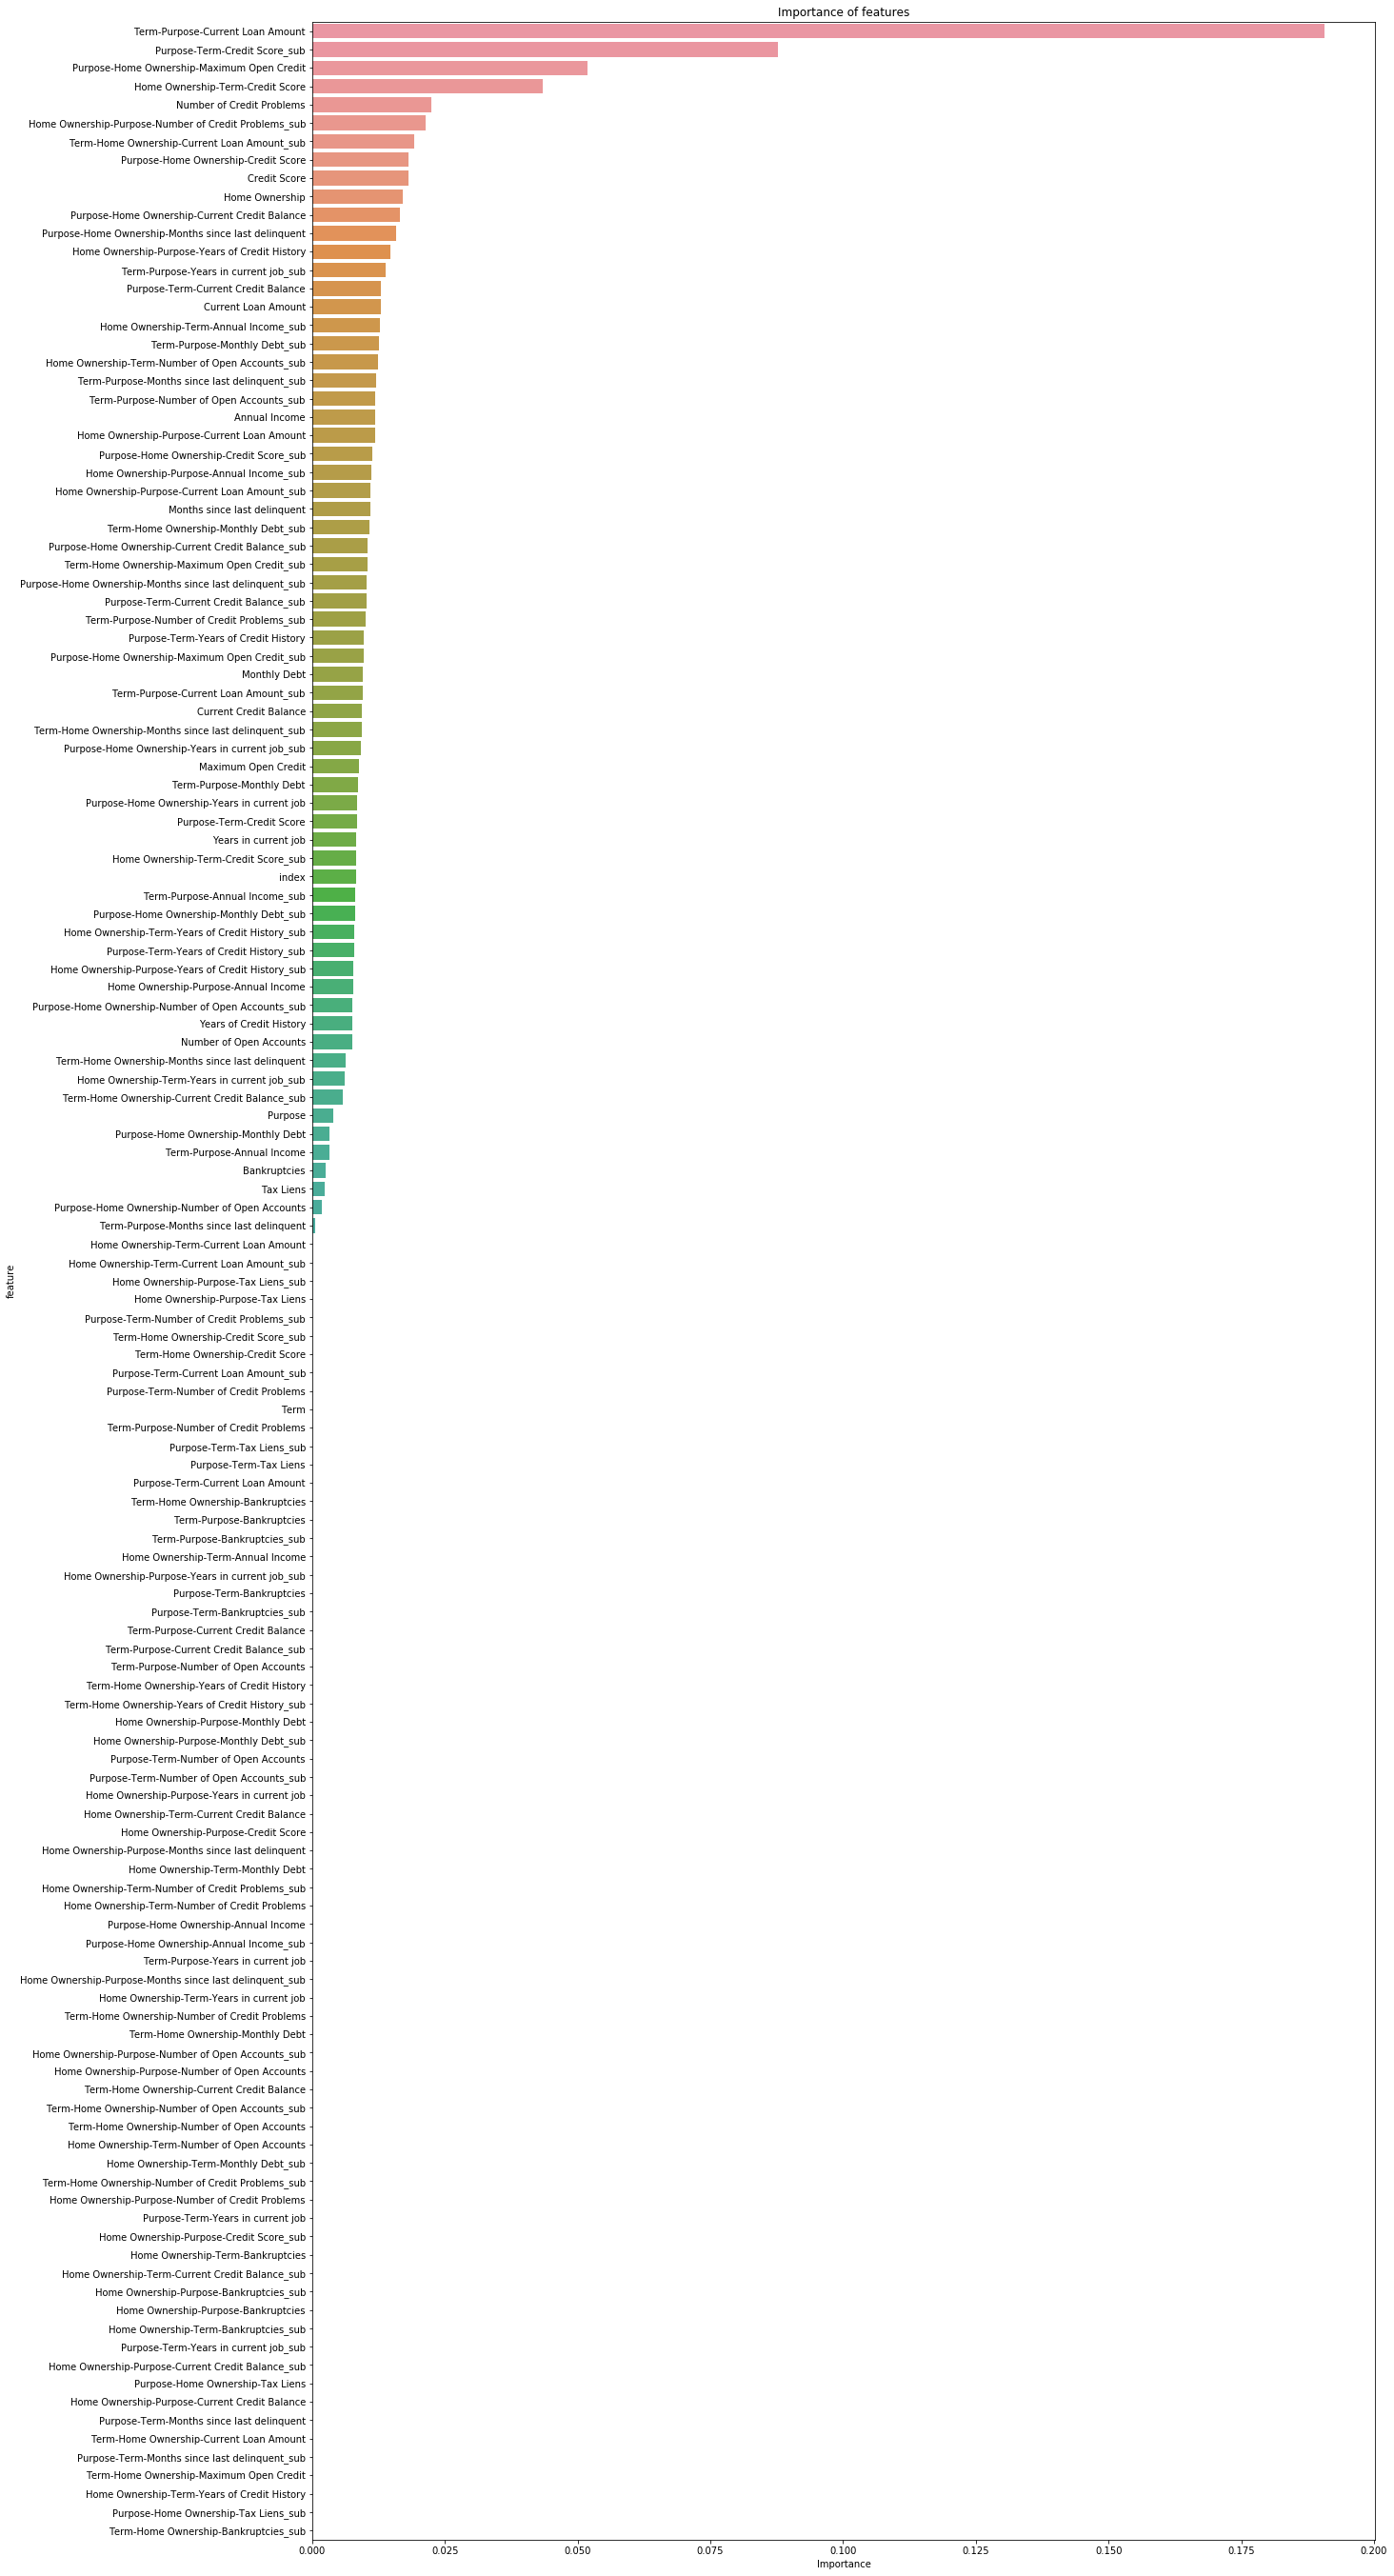

In [426]:
important_features_top = show_feature_importances(X_train.columns, model_x.feature_importances_, get_top=35)

In [427]:
important_features_top

['Term-Purpose-Current Loan Amount',
 'Purpose-Term-Credit Score_sub',
 'Purpose-Home Ownership-Maximum Open Credit',
 'Home Ownership-Term-Credit Score',
 'Number of Credit Problems',
 'Home Ownership-Purpose-Number of Credit Problems_sub',
 'Term-Home Ownership-Current Loan Amount_sub',
 'Purpose-Home Ownership-Credit Score',
 'Credit Score',
 'Home Ownership',
 'Purpose-Home Ownership-Current Credit Balance',
 'Purpose-Home Ownership-Months since last delinquent',
 'Home Ownership-Purpose-Years of Credit History',
 'Term-Purpose-Years in current job_sub',
 'Purpose-Term-Current Credit Balance',
 'Current Loan Amount',
 'Home Ownership-Term-Annual Income_sub',
 'Term-Purpose-Monthly Debt_sub',
 'Home Ownership-Term-Number of Open Accounts_sub',
 'Term-Purpose-Months since last delinquent_sub',
 'Term-Purpose-Number of Open Accounts_sub',
 'Annual Income',
 'Home Ownership-Purpose-Current Loan Amount',
 'Purpose-Home Ownership-Credit Score_sub',
 'Home Ownership-Purpose-Annual Income_

In [435]:
# Попробуем с топовыми признаками
model_x_final = xgb.XGBClassifier(random_state=100, learning_rate=1, max_depth=3, n_estimators=1200)
model_x_final.fit(X_train[important_features_top], y_train)

y_train_pred = model_x_final.predict(X_train[important_features_top])
y_test_pred = model_x_final.predict(X_test[important_features_top])

get_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN
-----------------------------
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3629
         1.0       1.00      1.00      1.00      1396

    accuracy                           1.00      5025
   macro avg       1.00      1.00      1.00      5025
weighted avg       1.00      1.00      1.00      5025


TEST
-----------------------------
              precision    recall  f1-score   support

         0.0       0.79      0.88      0.83      1758
         1.0       0.59      0.44      0.50       717

    accuracy                           0.75      2475
   macro avg       0.69      0.66      0.67      2475
weighted avg       0.73      0.75      0.74      2475



До заданного результата дойти не удалось. Даже на валидационной выборке

In [452]:
with open('final_model', 'wb') as file:
        pickle.dump(model_x_final, file)

In [436]:
# Видимо большего уже не успеть добиться
# Готовим тестовые данные
data_test = pd.read_csv('course_project_test.csv')

In [437]:
# Сделаем labelled категориальные признаки
data_labbeled_test = data_test.copy()
data_labbeled_test['Home Ownership'] = data['Home Ownership'].map(data.groupby('Home Ownership').size())
data_labbeled_test['Purpose'] = data['Purpose'].map(data.groupby('Purpose').size())
data_labbeled_test['Term'] = data['Term'].map(data.groupby('Term').size())
data_labbeled_test.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,647,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,5944,5556,162470.0,105906.0,6813.0,NaN
1,647,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,5944,1944,78298.0,46037.0,2318.0,699.0
2,3637,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,5944,5556,200178.0,146490.0,18729.0,7260.0
3,647,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,5944,5556,217382.0,213199.0,27559.0,739.0
4,3204,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,5944,5556,777634.0,425391.0,42605.0,706.0


In [438]:
# Years on current job
data_labbeled_test['Years in current job'] = data_labbeled_test['Years in current job'].fillna('0')
data_labbeled_test['Years in current job'] = data_labbeled_test.apply(lambda x: to_digit(x['Years in current job']), axis=1)
data_labbeled_test.head()

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,647,NaN,4,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,5944,5556,162470.0,105906.0,6813.0,NaN
1,647,231838.0,1,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,5944,1944,78298.0,46037.0,2318.0,699.0
2,3637,1152540.0,3,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,5944,5556,200178.0,146490.0,18729.0,7260.0
3,647,1220313.0,10,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,5944,5556,217382.0,213199.0,27559.0,739.0
4,3204,2340952.0,6,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,5944,5556,777634.0,425391.0,42605.0,706.0


In [439]:
data_labbeled_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
Home Ownership                  2500 non-null int64
Annual Income                   1987 non-null float64
Years in current job            2500 non-null int64
Tax Liens                       2500 non-null float64
Number of Open Accounts         2500 non-null float64
Years of Credit History         2500 non-null float64
Maximum Open Credit             2500 non-null float64
Number of Credit Problems       2500 non-null float64
Months since last delinquent    1142 non-null float64
Bankruptcies                    2497 non-null float64
Purpose                         2500 non-null int64
Term                            2500 non-null int64
Current Loan Amount             2500 non-null float64
Current Credit Balance          2500 non-null float64
Monthly Debt                    2500 non-null float64
Credit Score                    1987 non-null float64
dtypes: float64(12), int64(4)
memory 

In [440]:
# Пропуски
data_array =  imp_mean.transform(data_labbeled_test)
data_labbeled_test = pd.DataFrame(data=data_array, columns=data_labbeled_test.columns)
data_labbeled_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
Home Ownership                  2500 non-null float64
Annual Income                   2500 non-null float64
Years in current job            2500 non-null float64
Tax Liens                       2500 non-null float64
Number of Open Accounts         2500 non-null float64
Years of Credit History         2500 non-null float64
Maximum Open Credit             2500 non-null float64
Number of Credit Problems       2500 non-null float64
Months since last delinquent    2500 non-null float64
Bankruptcies                    2500 non-null float64
Purpose                         2500 non-null float64
Term                            2500 non-null float64
Current Loan Amount             2500 non-null float64
Current Credit Balance          2500 non-null float64
Monthly Debt                    2500 non-null float64
Credit Score                    2500 non-null float64
dtypes: float64(16)
memory us

In [441]:
# Добавляем синтетические признаки
data_labbaled_test_w_added_features = add_grouped_by_2_features(data_labbeled_test)

In [444]:
y_test_pred = model_x_final.predict(data_labbaled_test_w_added_features[important_features_top])

In [448]:
result_df_test = pd.DataFrame({'Credit Default': y_test_pred})
result_df_test.head(10)

,Credit Default
0,0.0
1,1.0
2,1.0
3,0.0
4,0.0
5,0.0
6,0.0
7,1.0
8,0.0
9,0.0


In [450]:
result_df_test.to_csv('SPologrudov_prediction.csv')